In [1]:
from pprint import pprint
import numpy as np
import pandas as pd
from procyclingstats import Race, RaceClimbs, Stage, RiderResults

In [8]:
rider_results = RiderResults("rider/tadej-pogacar/results")
test_results = RiderResults("rider.php?topn=1&km=5&filter=Filter&id=tadej-pogacar&p=results&s=final-5k-analysis")

In [9]:
pogacar_wins_final5k = test_results.final_n_km_results()

In [10]:
avg_percentages = []
for i in range(len(pogacar_wins_final5k)):
    avg_percentages.append(pogacar_wins_final5k[i]["average_percentage"])

print(sum(avg_percentages) / len(avg_percentages))

4.529545454545453


In [11]:
ala_results = RiderResults("rider.php?topn=1&km=5&filter=Filter&id=julian-alaphilippe&p=results&s=final-5k-analysis")
ala_wins_final5k = ala_results.final_n_km_results()

ala_avg_percentages = []
for i in range(len(ala_wins_final5k)):
    ala_avg_percentages.append(ala_wins_final5k[i]["average_percentage"])

print(sum(ala_avg_percentages) / len(ala_avg_percentages))

2.6656250000000012


In [12]:
cav_results = RiderResults("rider.php?topn=1&km=5&filter=Filter&id=mark-cavendish&p=results&s=final-5k-analysis")
cav_wins_final5k = cav_results.final_n_km_results()

cav_avg_percentages = []
for i in range(len(cav_wins_final5k)):
    cav_avg_percentages.append(cav_wins_final5k[i]["average_percentage"])

print(sum(cav_avg_percentages) / len(cav_avg_percentages))
print(cav_avg_percentages)

0.53
[0.8, 0.2, 0.7, 0.0, 0.1, 0.9, 0.4, 0.2, 0.5, 0.8, 0.5, 1.2, 0.6, 0.6, 0.1, 0.0, 0.0, 0.0, 0.7, 0.2, 0.0, 0.7, 0.8, 0.1, 0.4, 0.0, 0.7, 2.2, 0.0, 0.2, 0.4, 0.5, 0.8, 0.3, 1.7, 0.3, 0.3, 1.3, 0.7, 0.4, 0.9, 0.0, 0.8, 1.0, 0.1, 1.8, 1.5, 0.1, 0.0, 0.0]


In [184]:
wout_results = RiderResults("rider.php?topn=1&km=5&filter=Filter&id=wout-van-aert&p=results&s=final-5k-analysis")
wout_wins_final5k = wout_results.final_n_km_results()

wout_avg_percentages = []
for i in range(len(wout_wins_final5k)):
    wout_avg_percentages.append(wout_wins_final5k[i]["average_percentage"])

print(sum(wout_avg_percentages) / len(wout_avg_percentages))
print(wout_avg_percentages)

1.1370370370370368
[0.2, 1.4, 4.8, 0.0, 0.3, 0.2, 0.2, 0.2, 0.1, 1.4, 3.8, 2.3, 0.1, 0.1, 0.3, 0.5, 0.0, 0.0, 0.0, 1.7, 5.1, 0.4, 1.7, 1.0, 1.5, 1.7, 1.7]


In [13]:
wout_results = RiderResults("rider.php?topn=1&km=5&filter=Filter&id=jonas-vingegaard-rasmussen&p=results&s=final-5k-analysis")
wout_wins_final5k = wout_results.final_n_km_results()

wout_avg_percentages = []
for i in range(len(wout_wins_final5k)):
    wout_avg_percentages.append(wout_wins_final5k[i]["average_percentage"])

print(sum(wout_avg_percentages) / len(wout_avg_percentages))
print(wout_avg_percentages)

4.4944444444444445
[10.8, 0.0, 1.6, 1.4, 3.3, 3.1, 6.0, 2.5, 2.4, 10.5, 10.8, 8.6, 1.5, 4.1, 4.8, 4.3, 3.3, 1.9]


In [69]:
e1 = "rider.php?xseason="
Year = "2005"
e2 = "&zxseason=&pxseason=equal&sort=date&race=&km1=&zkm1=&pkm1=equal&limit=200&topx=&ztopx=&ptopx=smallerorequal&type=&znation=&continent=&pnts=&zpnts2022=&ppnts=equal&level=wt&rnk=&zrnk=&prnk=equal&exclude_tt=0&racedate=&zracedate=&pracedate=equal&name=&pname=contains&category=&profile_score=&zprofile_score=&pprofile_score=largerorequal&filter=Filter&id="
Rider = "wout-van-aert"
e3 = "&p=results&s=all"

rider_res = RiderResults(f"{e1}{Year}{e2}{Rider}{e3}")

len(rider_res.results())

0

In [213]:
def RiderResultsOneYear(rider, year):

    e1 = "rider.php?xseason="
    e2 = "&zxseason=&pxseason=equal&sort=date&race=&km1=&zkm1=&pkm1=equal&limit=200&topx=&ztopx=&ptopx=smallerorequal&type=&znation=&continent=&pnts=&zpnts2022=&ppnts=equal&level=wt&rnk=&zrnk=&prnk=equal&exclude_tt=0&racedate=&zracedate=&pracedate=equal&name=&pname=contains&category=1&profile_score=&zprofile_score=&pprofile_score=largerorequal&filter=Filter&id="
    e3 = "&p=results&s=all"

    rider_res = RiderResults(f"{e1}{year}{e2}{rider}{e3}")

    results = rider_res.results()

    if len(results) == 0:
        return (1, False)
    else:
        # List to store dictionaries with only the first two key-value pairs
        results_one_day = []

        # Iterate through the original list and create new dictionaries
        for dictionary in results:
            new_dict = {k: v for i, (k, v) in enumerate(dictionary.items())}
            if dictionary["distance"] != None:
                results_one_day.append(new_dict)

        results_one_day

        df = pd.DataFrame(results_one_day)

        m_verts = []
        profile_scores = []
        won_hows = []

        for stage in df["stage_url"]:
            profile_score, won_how, m_vert = "Filler", "Filler", "Filler"

            try:
                stage_info = Stage(f"{stage}")
                try:
                    profile_score = stage_info.profile_score()
                    won_how = stage_info.won_how()
                    m_vert = stage_info.vertical_meters()
                except Exception as e:
                    print("an error occurred: ", e)
                    profile_scores.append(profile_score)
                    won_hows.append(won_how)
                    m_verts.append(m_vert)
                    continue
            except Exception as e:
                print("An error occurred: ", e)
                profile_scores.append(profile_score)
                won_hows.append(won_how)
                m_verts.append(m_vert)
                continue
            profile_scores.append(profile_score)
            won_hows.append(won_how)
            m_verts.append(m_vert)


        df["vertical meters"] = m_verts
        df["profile score"] = profile_scores
        df["won how"] = won_hows

        return (df, True)

def RiderResultsAllYears(rider):
    rider_results_per_year = []
    for year in range(2005, 2024):
        results_one_year, was_riding = RiderResultsOneYear(rider, str(year))
        if was_riding != False:
            rider_results_per_year.append(results_one_year)
    rider_results_all_years = pd.concat(rider_results_per_year, ignore_index=True)
    return rider_results_all_years



In [217]:
wout = RiderResultsOneYear("dylan-van-baarle", "2015")

an error occurred:  list index out of range
an error occurred:  list index out of range


(          date   rank                                stage_url  \
 0   2015-09-27   96.0      race/world-championship/2015/result   
 1   2015-09-20   12.0  race/world-championship-ttt/2015/result   
 2   2015-08-30   60.0        race/bretagne-classic/2015/result   
 3   2015-08-23  124.0      race/cyclassics-hamburg/2015/result   
 4   2015-08-16   44.0            race/renewi-tour/2015/stage-7   
 5   2015-08-15   41.0            race/renewi-tour/2015/stage-6   
 6   2015-08-14    2.0            race/renewi-tour/2015/stage-5   
 7   2015-08-13   15.0            race/renewi-tour/2015/stage-4   
 8   2015-08-12   37.0            race/renewi-tour/2015/stage-3   
 9   2015-08-11   64.0            race/renewi-tour/2015/stage-2   
 10  2015-08-10   95.0            race/renewi-tour/2015/stage-1   
 11  2015-07-26   52.0        race/tour-de-france/2015/stage-21   
 12  2015-07-25   83.0        race/tour-de-france/2015/stage-20   
 13  2015-07-24   68.0        race/tour-de-france/2015/stage-1

In [158]:
e1 = "rider.php?xseason="
Year = "2015"
e2 = "&zxseason=&pxseason=equal&sort=date&race=&km1=&zkm1=&pkm1=equal&limit=200&topx=&ztopx=&ptopx=smallerorequal&type=&znation=&continent=&pnts=&zpnts2022=&ppnts=equal&level=wt&rnk=&zrnk=&prnk=equal&exclude_tt=0&racedate=&zracedate=&pracedate=equal&name=&pname=contains&category=1&profile_score=&zprofile_score=&pprofile_score=largerorequal&filter=Filter&id="
Rider = "jasper-philipsen"
e3 = "&p=results&s=all"

rider_res = RiderResults(f"{e1}{Year}{e2}{Rider}{e3}")

p_res = rider_res.results()

df_p_res = pd.DataFrame(p_res)

df_p_res["stage_url"]

# for stage in df_p_res["stage_url"]:
#             stage_info = Stage(f"{stage}")
#             profile_score = stage_info.profile_score()



KeyError: 'stage_url'

In [4]:
ronde_2022 = Stage("race/ronde-van-vlaanderen/2022/result")

ronde_2022_results = ronde_2022.results()

ronde_2022_top_20 = []
for i in range(21):
    rider = ronde_2022_results[i]["rider_url"][6:]
    ronde_2022_top_20.append(rider)

ronde_2022_top_20

['mathieu-van-der-poel',
 'dylan-van-baarle',
 'valentin-madouas',
 'tadej-pogacar',
 'stefan-kung',
 'dylan-teuns',
 'alfred-wright',
 'mads-pedersen',
 'christophe-laporte',
 'alexander-kristoff',
 'michael-matthews',
 'jan-tratnik',
 'tiesj-benoot',
 'thomas-pidcock',
 'greg-van-avermaet',
 'danny-van-poppel',
 'matis-louvel',
 'john-degenkolb',
 'mike-teunissen',
 'alex-aranburu',
 'matej-mohoric']

In [5]:
ronde_2022_top_20_career_results = []
for rider in ronde_2022_top_20:
    rider_career_results = RiderResultsAllYears(rider)
    ronde_2022_top_20_career_results.append(rider_career_results)

NameError: name 'RiderResultsAllYears' is not defined

In [206]:
for i in range(len(ronde_2022_top_20_career_results)):
    ronde_2022_top_20_career_results[i].to_csv(f"Ronde_2022/ronde_2022_top_20_career_results_{ronde_2022_top_20[i]}_place.csv", index=False)

In [3]:
roubaix_2022 = Stage("race/paris-roubaix/2022/result")

roubaix_2022_results = roubaix_2022.results()

roubaix_2022_top_20 = []
for i in range(21):
    rider = roubaix_2022_results[i]["rider_url"][6:]
    roubaix_2022_top_20.append(rider)

roubaix_2022_top_20 = [rider for rider in roubaix_2022_top_20 if rider not in ronde_2022_top_20]

NameError: name 'ronde_2022_top_20' is not defined

In [220]:
roubaix_2022_top_20_career_results = []
for rider in roubaix_2022_top_20:
    rider_career_results = RiderResultsAllYears(rider)
    roubaix_2022_top_20_career_results.append(rider_career_results)

an error occurred:  list index out of range
an error occurred:  list index out of range
an error occurred:  list index out of range
an error occurred:  list index out of range
an error occurred:  list index out of range
an error occurred:  list index out of range
an error occurred:  list index out of range
an error occurred:  list index out of range
an error occurred:  list index out of range
an error occurred:  list index out of range
an error occurred:  list index out of range
an error occurred:  list index out of range
an error occurred:  list index out of range
an error occurred:  list index out of range
an error occurred:  list index out of range
an error occurred:  list index out of range
an error occurred:  list index out of range
an error occurred:  list index out of range
an error occurred:  list index out of range
an error occurred:  list index out of range
an error occurred:  list index out of range
an error occurred:  list index out of range
an error occurred:  list index o

In [247]:
for rider in roubaix_2022_top_20:
    print(rider)

wout-van-aert
tom-devriendt
adrien-petit
jasper-stuyven
laurent-pichon
yves-lampaert
ben-turner
florian-senechal
jordi-meeus
taco-van-der-hoorn
andrea-pasqualon
stefan-bissegger


In [221]:
for i in range(len(roubaix_2022_top_20_career_results)):
    roubaix_2022_top_20_career_results[i].to_csv(f"Roubaix_2022_minus_Ronde/roubaix_2022_top_20_career_results_{roubaix_2022_top_20[i]}_place.csv", index=False)

In [284]:
race_difficulty = ronde_2022_top_20_career_results[7][["profile score", "rank"]]
# rank = roubaix_2022_top_20_career_results[9]["rank"]


In [285]:
top10s = race_difficulty[race_difficulty["rank"] < 51]

In [274]:
for rider in ronde_2022_top_20:
    print(rider)

mathieu-van-der-poel
dylan-van-baarle
valentin-madouas
tadej-pogacar
stefan-kung
dylan-teuns
alfred-wright
mads-pedersen
christophe-laporte
alexander-kristoff
michael-matthews
jan-tratnik
tiesj-benoot
thomas-pidcock
greg-van-avermaet
danny-van-poppel
matis-louvel
john-degenkolb
mike-teunissen
alex-aranburu
matej-mohoric


In [6]:
import matplotlib.pyplot as plt

In [12]:
ronde_2022_top_20

['mathieu-van-der-poel',
 'dylan-van-baarle',
 'valentin-madouas',
 'tadej-pogacar',
 'stefan-kung',
 'dylan-teuns',
 'alfred-wright',
 'mads-pedersen',
 'christophe-laporte',
 'alexander-kristoff',
 'michael-matthews',
 'jan-tratnik',
 'tiesj-benoot',
 'thomas-pidcock',
 'greg-van-avermaet',
 'danny-van-poppel',
 'matis-louvel',
 'john-degenkolb',
 'mike-teunissen',
 'alex-aranburu',
 'matej-mohoric']

In [69]:
ronde_top_20 = []
for rider in ronde_2022_top_20:
    ronde_top_20.append(pd.read_csv(f"Ronde_2022/ronde_2022_top_20_career_results_{rider}_place.csv"))

ronde_top_20[8]

,date,rank,stage_url,stage_name,nationality,class,distance,pcs_points,uci_points,vertical meters,profile score,won how
0,2014-04-13,103.0,race/paris-roubaix/2014/result,Paris - Roubaix,FR,1.UWT,257.0,5,0.0,1318,6,6.3 km solo
1,2015-08-30,37.0,race/bretagne-classic/2015/result,GP Ouest France - Plouay,FR,1.UWT,229.1,5,0.0,Filler,Filler,Filler
2,2015-07-26,12.0,race/tour-de-france/2015/stage-21,Tour de France | Stage 21,FR,2.UWT,109.5,6,0.0,562,5,Sprint of large group
3,2015-07-25,78.0,race/tour-de-france/2015/stage-20,Tour de France | Stage 20,FR,2.UWT,110.5,0,0.0,3164,332,6.4 km solo
4,2015-07-24,123.0,race/tour-de-france/2015/stage-19,Tour de France | Stage 19,FR,2.UWT,138.0,0,0.0,4545,376,16.2 km solo
...,...,...,...,...,...,...,...,...,...,...,...,...
333,2023-03-29,1.0,race/dwars-door-vlaanderen/2023/result,Dwars door Vlaanderen - A travers la Flandre ME,BE,1.UWT,183.7,225,300.0,1459,44,4 km solo
334,2023-03-26,1.0,race/gent-wevelgem/2023/result,Gent-Wevelgem in Flanders Fields ME,BE,1.UWT,260.9,225,500.0,1375,34,Other
335,2023-03-24,23.0,race/e3-harelbeke/2023/result,E3 Saxo Classic,BE,1.UWT,204.1,12,16.0,2017,58,Sprint of small group
336,2023-03-18,13.0,race/milano-sanremo/2023/result,Milano-Sanremo,IT,1.UWT,294.0,38,85.0,2154,63,5.5 km solo


In [86]:
type(ronde_top_20[8]["rank"][31])

numpy.float64

In [100]:
mask = ronde_top_20[8]["profile score"] != "Filler"
filtered_ronde_top_20 = ronde_top_20[8][mask]

filtered_ronde_top_20 = []

for pos in range(len(ronde_2022_top_20)):
    mask = (ronde_top_20[pos]["profile score"] != "Filler")
    filtered_ronde_top_20.append(ronde_top_20[pos][mask])

for pos in range(len(ronde_2022_top_20)):
    mask = np.isnan(ronde_top_20[pos]["rank"]) == False
    filtered_ronde_top_20[pos] = (filtered_ronde_top_20[pos][mask])

filtered_ronde_top_20[8][250:300]

/var/folders/f1/m1ggk_2j6sg3vl8gbd6xc_080000gn/T/ipykernel_26447/2548157097.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_ronde_top_20[pos] = (filtered_ronde_top_20[pos][mask])


,date,rank,stage_url,stage_name,nationality,class,distance,pcs_points,uci_points,vertical meters,profile score,won how
274,2022-07-06,54.0,race/tour-de-france/2022/stage-5,Tour de France | Stage 5,FR,2.UWT,157.0,0,0.0,601,1,Sprint of small group
275,2022-07-05,3.0,race/tour-de-france/2022/stage-4,Tour de France | Stage 4,FR,2.UWT,171.5,50,25.0,1785,63,11.6 km solo
276,2022-07-03,6.0,race/tour-de-france/2022/stage-3,Tour de France | Stage 3,FR,2.UWT,182.0,26,0.0,1280,16,Sprint of large group
277,2022-07-02,18.0,race/tour-de-france/2022/stage-2,Tour de France | Stage 2,FR,2.UWT,202.2,0,0.0,1149,11,Sprint of large group
278,2022-07-01,25.0,race/tour-de-france/2022/stage-1,Tour de France | Stage 1 (ITT),FR,2.UWT,13.2,0,0.0,21,0,Time Trial
280,2022-06-11,115.0,race/dauphine/2022/stage-7,Critérium du Dauphiné | Stage 7,FR,2.UWT,134.8,0,0.0,3828,311,5.7 km solo
281,2022-06-10,111.0,race/dauphine/2022/stage-6,Critérium du Dauphiné | Stage 6,FR,2.UWT,196.5,0,0.0,2958,74,0.7 km solo
282,2022-06-09,14.0,race/dauphine/2022/stage-5,Critérium du Dauphiné | Stage 5,FR,2.UWT,162.3,0,0.0,1991,60,Sprint of large group
283,2022-06-08,109.0,race/dauphine/2022/stage-4,Critérium du Dauphiné | Stage 4 (ITT),FR,2.UWT,31.9,0,0.0,96,1,Time Trial
284,2022-06-07,130.0,race/dauphine/2022/stage-3,Critérium du Dauphiné | Stage 3,FR,2.UWT,169.0,0,0.0,2707,140,Sprint of small group


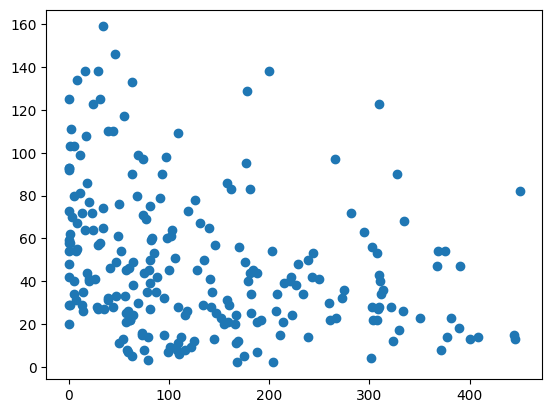

In [153]:
rider_num = 2
result = filtered_ronde_top_20[rider_num]["rank"]
profile_score = pd.to_numeric(filtered_ronde_top_20[rider_num]["profile score"])

# meters_per_km = filtered_ronde_top_20[rider_num]["vertical meters"] / filtered_ronde_top_20[rider_num]["distance"]

plt.scatter(profile_score, result)

In [113]:
type(profile_score[0])

numpy.int64

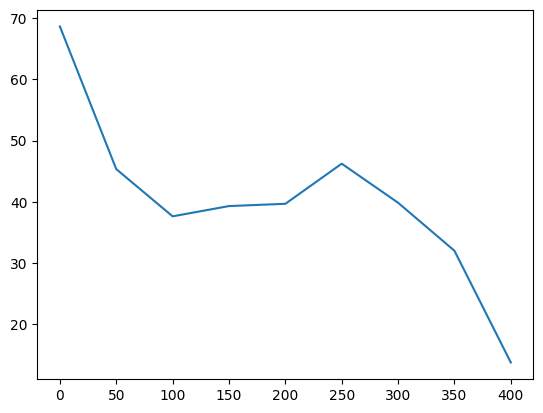

In [154]:
profile_edges = np.arange(0, 500, 50)
bin_indices = np.digitize(profile_score, profile_edges)

mean_result = [np.mean(result[bin_indices == i]) for i in range(1, len(profile_edges))]
mean_result = np.nan_to_num(mean_result, nan=0.0)

plt.plot(profile_edges[0:len(profile_edges)-1], mean_result)

In [147]:
# How does the placement in the ronde depend on the rider's best profile score region?

def BestProfScore(rider_num):
    result = filtered_ronde_top_20[rider_num]["rank"]
    profile_score = pd.to_numeric(filtered_ronde_top_20[rider_num]["profile score"])

    profile_edges = np.arange(0, 500, 50)
    bin_indices = np.digitize(profile_score, profile_edges)

    mean_result = [np.mean(result[bin_indices == i]) for i in range(1, len(profile_edges))]
    mean_result = np.nan_to_num(mean_result, nan=200.0)

    best_prof_score = []
    for i in range(len(profile_edges)-1):
        if mean_result[i] == min(mean_result):
            best_prof_score.append(profile_edges[i])
        else:
            best_prof_score.append(5000)

    return min(best_prof_score)



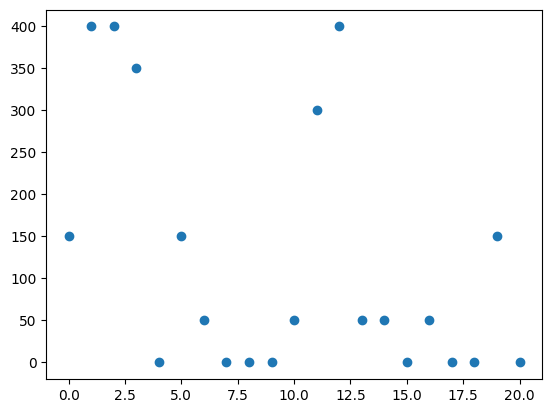

In [162]:
ronde_places = np.arange(0, 21, 1)
best_prof_scores = [BestProfScore(place) for place in ronde_places]

plt.scatter(ronde_places, best_prof_scores)
